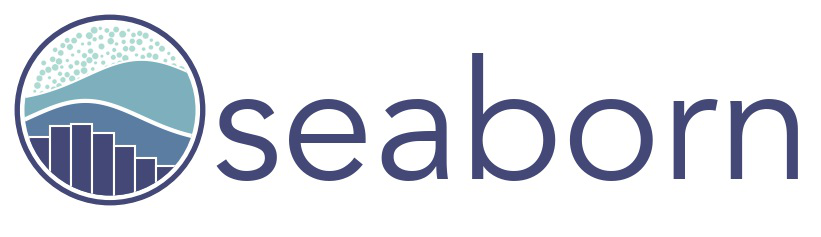

In [1]:
import requests
from io import BytesIO
from PIL import Image
url = "https://raw.githubusercontent.com/tuhin-datascience/images/main/seaborn%20logo.jpg"
page = requests.get(url)
Image.open(BytesIO(page.content))

### **Installing/ Importing of library**

Before using Seaborn, we need to install it and here we are going to see how to install it on our computer.

**Using Pip Installer**

pip is a de facto standard package-management system used to install and manage software packages written in Python.

In [18]:
!pip install seaborn

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import warnings # Current version of Seaborn generates a bunch of warnings that we'll ignore in this tutorial
warnings.filterwarnings("ignore")

### **2.Exploring Seaborn Plots**

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

### **2.1. A simple line chart**

In [21]:
# First we will create some random data
rng = np.random.RandomState(123)
x = np.linspace(0, 10, 250)
y = np.cumsum(rng.randn(250, 6), 0)



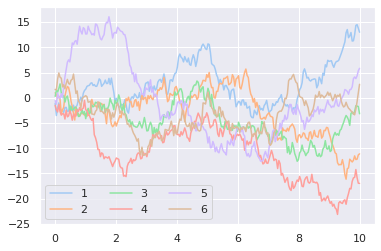

In [22]:
# Plot the data with default Matplotlib 
plt.plot(x, y)
plt.legend('123456', ncol=3, loc='lower left');



As we can see this graph is not asthetically pleasing and not very eye-catching. Thankfully we have some tool in our dispense that we can use to remove these problems. And that tool is `Searborn` library. 

Seaborn is a data visualization library built on top of matplotlib and closely integrated with pandas data frame in Python. One has to be familiar with Numpy and Matplotlib and Pandas to learn about Seaborn.

In [29]:
# We can set the style by calling Seaborn's set() method. 
sns.set_theme(palette="pastel")

For sns.set_theme() we can set the style and pallette to create more eye-catching visuals.

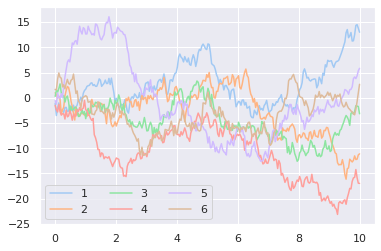

In [24]:
# Now we run the same plt again
plt.plot(x, y)
plt.legend('123456', ncol=3, loc='lower left');

**2.2. Histograms, KDE, and Densities**

Often in statistical data visualization, all we want is to plot histograms and joint distributions of variables. We have seen (Matplotlib tutorial) that this is relatively straightforward in Matplotlib.

First we will create some random data and create a pandas dataframe with those data.


In [26]:
#Simple Example  
import random
# creating the raw data
np.random.seed(123)
x = np.random.randn(10000) * 10 + 100
y = np.random.randn(10000)*10 +120

df = pd.DataFrame()
df['X'] = pd.Series(x)
df['Y'] = pd.Series(y)

df.head()

,X,Y
0,89.143694,107.590303
1,109.973454,116.870532
2,102.829785,111.510532
3,84.937053,143.779526
4,94.213997,126.575006


**2.2.1. Plotting Histogram**

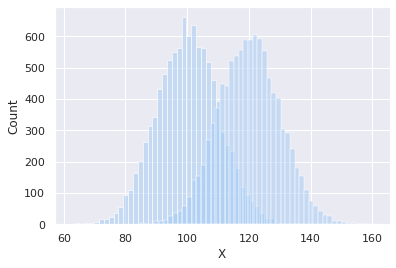

In [30]:
for col in df.columns:
  sns.histplot(df[col], alpha=0.5, bins=50)


**2.2.2. Plotting Distribution plot**

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with `sns.kdeplot(`).

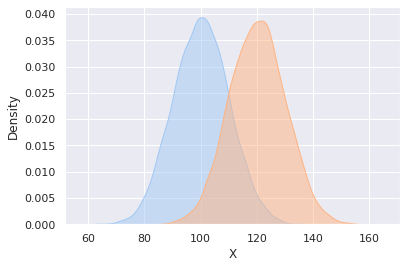

In [31]:
for col in df.columns:
  sns.kdeplot(df[col], alpha=0.5, shade=True)

**2.2.3. Combination of Histogram and Distribution plot**

Next, we have combined Histograms and KDE together using Seaborn `distplot()`.

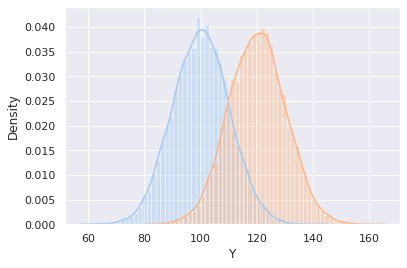

In [32]:
# Distribution plot with Seaborn
sns.distplot(df['X'])
sns.distplot(df['Y'])

**2.3. KDE Plot**

If we pass the full two-dimensional dataset to kdeplot, we will get a two-dimensional visualization of the data. Since,in our dataset we have columns it will show us two graphs.

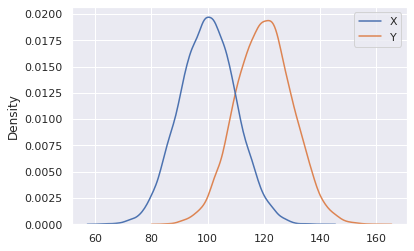

In [64]:
sns.kdeplot(data=df)

**2.4. Jointplot**

We can see the joint distribution and the marginal distributions together using `sns.jointplot()`. For this plot, we'll set the style to a white background.

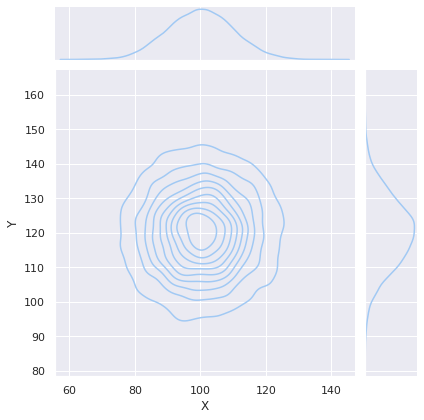

In [34]:
with sns.axes_style("darkgrid"):
  sns.jointplot("X", "Y", data=df, kind='kde')

**2.4.1. Hex type Jointplot**

There are other parameters that can be passed to jointplot—for example, we can use a hexagonally based histogram instead:

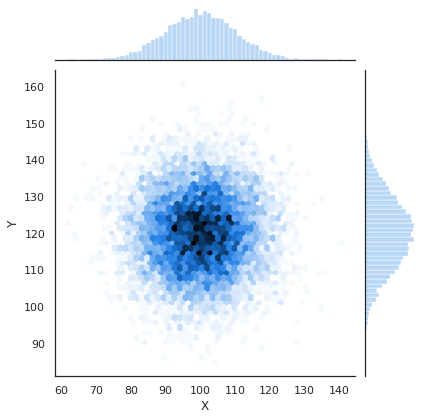

In [36]:
with sns.axes_style('white'):
    sns.jointplot("X", "Y", df, kind='hex')

### **3. Exploratory Data Analysis**

So far we have seen some of the graphs that can be created with Seaborn. Now, we want to do an exploratory data analysis with the "MPG" data. In fact, Seabon contains a few dataset and we can  use `sns.load_datset()` to load those dataset into our working environment.

In [37]:
# Loading 'mpg' dataset.
mpg = sns.load_dataset('mpg')
print(mpg.shape)
print("\n")
mpg.head()

(398, 9)




,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Let us do some standard statistical analysis. Some of the methods such as info(), insull() and describe() can be used to to get some of the statistical information about the datset.

In [14]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


info() method gives us the information regarding the datatype and the number of non-null counts.

In [15]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

The combination of `isnull().sum()` give the number of null values for each of the variables.

In [38]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [39]:
mpg.describe(include=object)

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


**3.1. Bar chart**

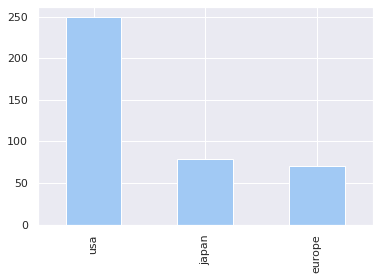

In [40]:
mpg['origin'].value_counts().plot.bar()

**Bar chart with Hue**

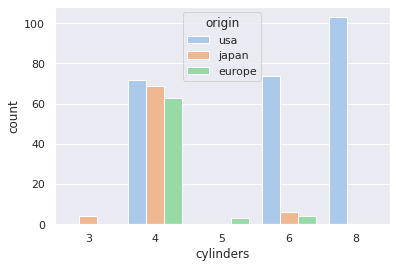

In [41]:
sns.countplot(data=mpg, x='cylinders', hue='origin')

Here, we have divided different cylinders capacity based on their country of origin which are represented by different colours.

**3.2. Categorial plot or catplot**

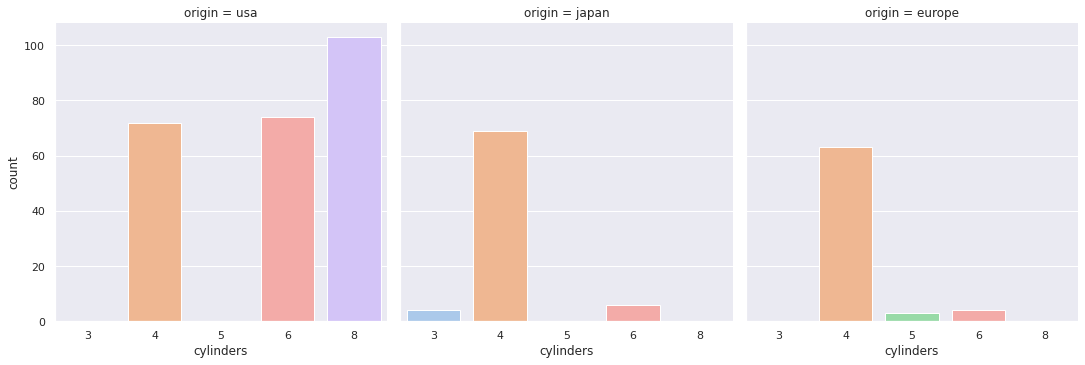

In [42]:
sns.catplot(data=mpg, x="cylinders", kind="count", col="origin")

Categorical plot divide into a number of visuals based on the numbers of categories of the defined variable, e.g. here, we have set country of origin as our variable and since, this variable has three different value (USA, JAPAN and Europe) the graph is divied into three differnt visual. This visulal very easy into interpret, but not very effective if the variable got a large number of distinct values.

**3.3. Useage of Figure and Axes in Seaborn**

Just like Matplotlib we can use Figure and Axes in the Seaborn as well. 

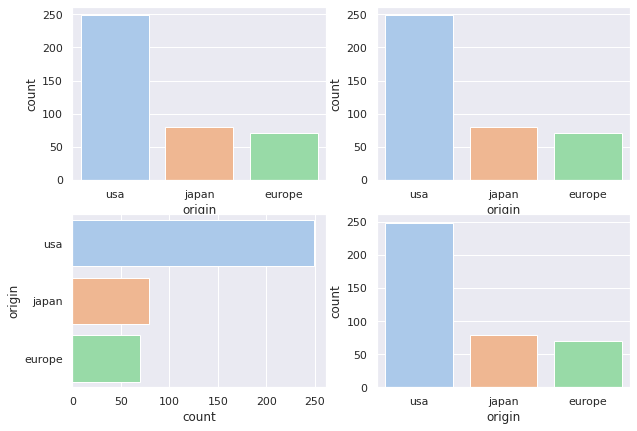

In [43]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

sns.countplot(data=mpg, x='origin', ax=ax[0,0])
sns.countplot(data=mpg, x='origin', ax=ax[0,1])
sns.countplot(data=mpg, y='origin', ax=ax[1,0])
sns.countplot(data=mpg, x='origin', ax=ax[1,1])

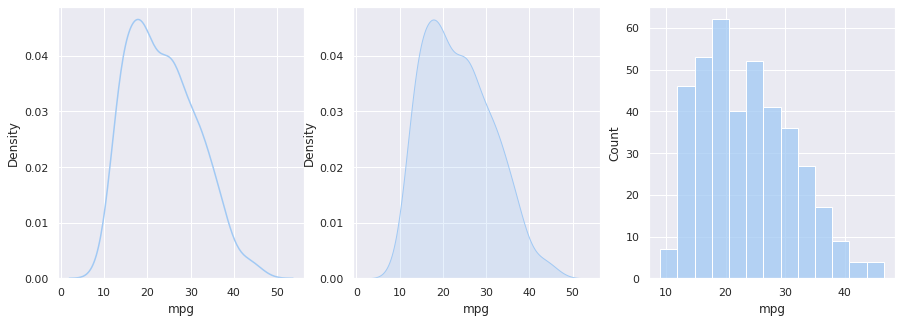

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.kdeplot(data=mpg['mpg'], ax=ax[0])
sns.kdeplot(data=mpg['mpg'], shade=True, ax=ax[1])
sns.histplot(data=mpg['mpg'], ax=ax[2])


**3.4. Scatterplot**

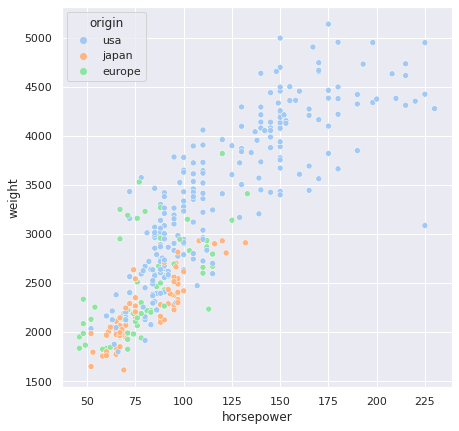

In [45]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=mpg, x='horsepower', y='weight', hue='origin')

**3.5. Violin plot**

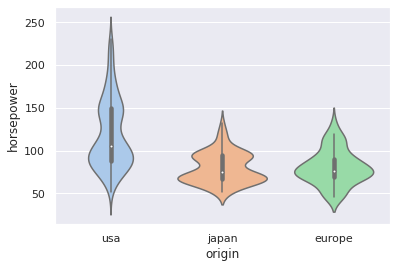

In [56]:
sns.violinplot(data=mpg, x='origin', y='horsepower')

**3.6. Box plot**

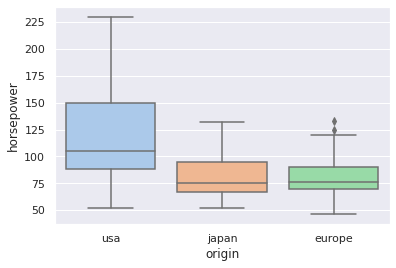

In [57]:
sns.boxplot(data=mpg, x='origin', y='horsepower')

**3.7. Regression Plot**

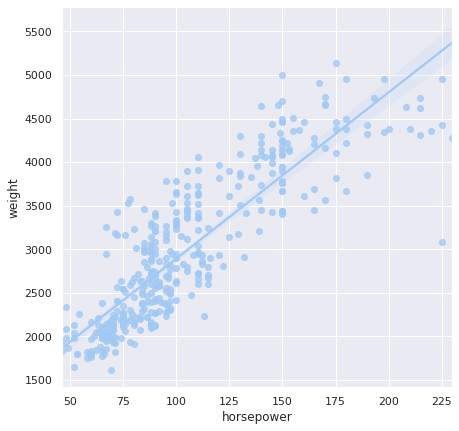

In [48]:
plt.figure(figsize=(7,7))
sns.regplot(data=mpg, x='horsepower', y='weight')

<Figure size 504x504 with 0 Axes>

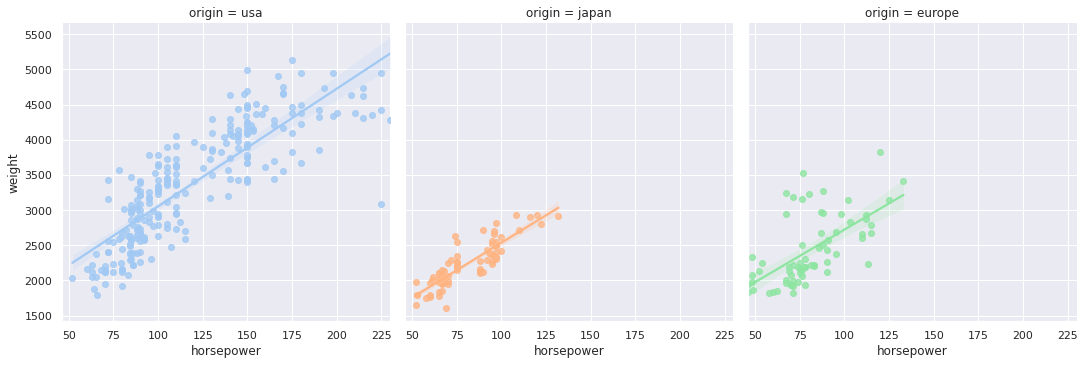

In [49]:
plt.figure(figsize=(7,7))
sns.lmplot(data=mpg, x='horsepower', y='weight', col='origin', hue='origin')

**3.8. Jointplot with Regression plot**


We have already seen the joint plot but here, in the section we will see how we can combine the jointplot along with the regression plot. so the first plot here is a simple joinplot and the second one is the jointplot combined with a regression plot.

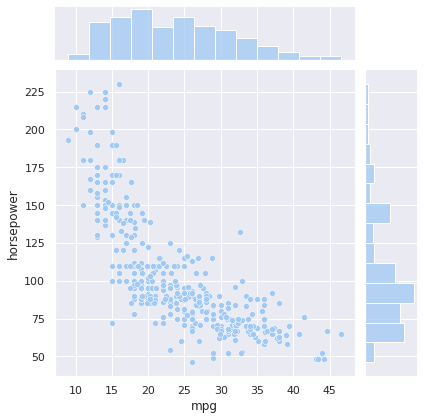

In [50]:
sns.jointplot(data=mpg, x='mpg', y='horsepower')

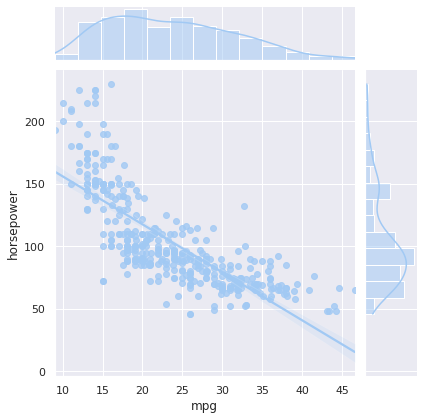

In [51]:
sns.jointplot(data=mpg, x='mpg', y='horsepower', kind='reg')

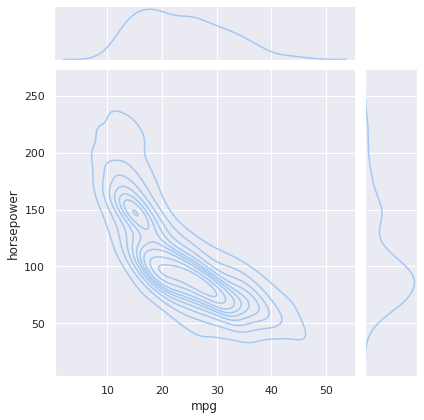

In [52]:
sns.jointplot(data=mpg, x="mpg", y="horsepower", kind="kde")

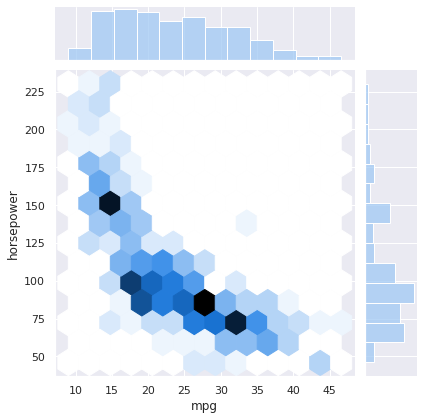

In [53]:
sns.jointplot(data=mpg, x="mpg", y="horsepower", kind="hex")

**3.9. Pairplot**

Pairplot probably one of the most used graph in Seaborn, it takes all the numerical varibles of the entire dataset and then crete scatter plot against each of the variables. Infact we can even use the `'hue'` component to assign another variable. From this graph only we can have a fare amount of knowledge about the data and the relartionships among different variables.

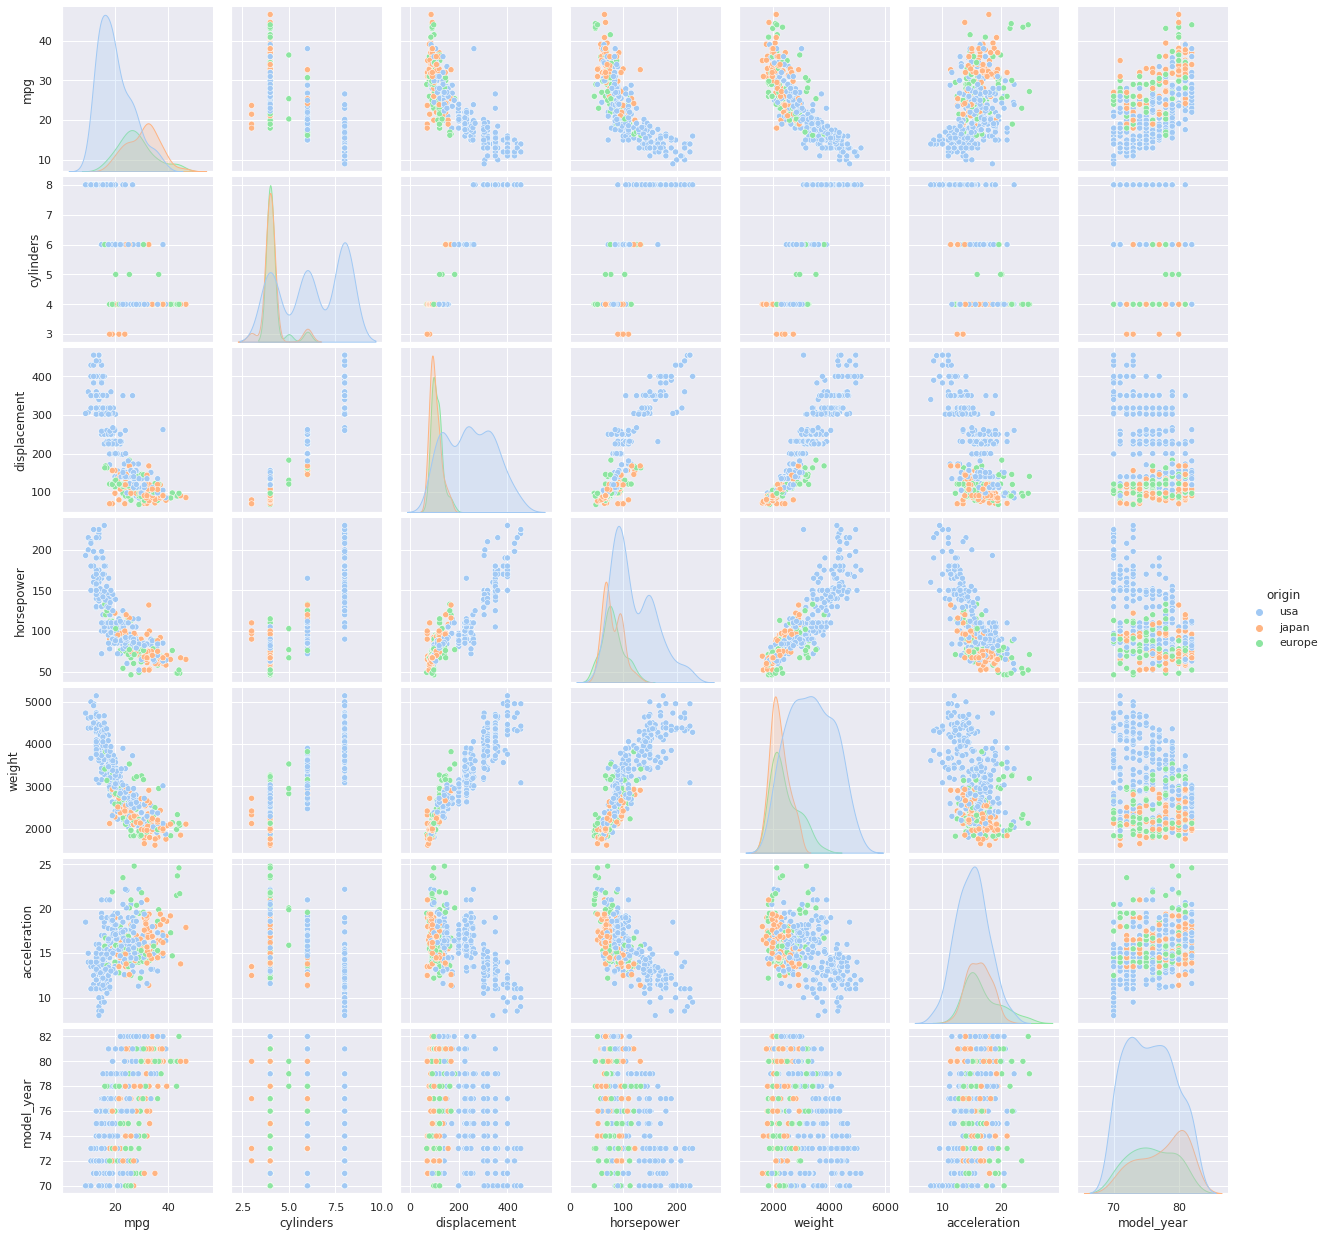

In [54]:
sns.pairplot(data=mpg, hue='origin')

**3.10. Heatmap**

Heatmap is another very popular graph of Seaborn, it is basically shows the strength of the correlation co-efficient through a colour map. Because if this colour map it become quite easy to understand the relationships between the variables.

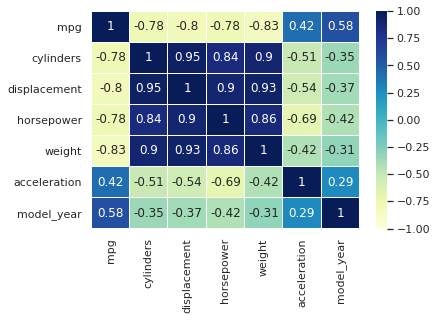

In [55]:
mat = mpg.corr()

sns.heatmap(data=mat, vmax=1, vmin=-1, cmap='YlGnBu', annot=True, linewidths=0.05)